# Model Training

## Importing Data and Packages

In [ ]:
%pip install xgboost catboost

# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV 
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')




## Getting the CSV Dataset

In [18]:
import pandas as pd
df = pd.read_csv('../data/ecommerce_customer.csv') 

In [19]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [20]:
df = df.drop(columns=['Email', 'Address', 'Avatar'])  # Drop unnecessary columns

In [21]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


# Preparing for the Machine Learning

In [22]:
X = df.drop('Yearly Amount Spent', axis=1)
y = df['Yearly Amount Spent']   

In [23]:
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [24]:
# Creating Column Transformer and StandardScaler
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [  
        ("StandardScaler", numeric_transformer, num_features),
    ]
)    

In [25]:
X = preprocessor.fit_transform(X)   

In [26]:
X.shape

(500, 4)

In [27]:
# seperate into train and test sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_train.shape, X_test.shape



((400, 4), (100, 4))

In [28]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true, predicted)
    r2 = r2_score(true, predicted)
    return mse, rmse, mae, r2

## Metrics Model Training

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=0),
    "Support Vector Regressor": SVR()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train the model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model
    model_train_mse, model_train_rmse, model_train_mae, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mse, model_test_rmse, model_test_mae, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for Training set")
    print("-Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("-Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("-R2 Score: {:.4f}".format(model_train_r2))

    print('..........................................')

    print("Model performance for Test set")
    print("-Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("-Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("-R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')   

          


          

Linear Regression
Model performance for Training set
-Root Mean Squared Error: 9.7889
-Mean Absolute Error: 7.7270
-R2 Score: 0.9854
..........................................
Model performance for Test set
-Root Mean Squared Error: 10.4816
-Mean Absolute Error: 8.5584
-R2 Score: 0.9778


Ridge Regression
Model performance for Training set
-Root Mean Squared Error: 9.7906
-Mean Absolute Error: 7.7211
-R2 Score: 0.9854
..........................................
Model performance for Test set
-Root Mean Squared Error: 10.4621
-Mean Absolute Error: 8.5394
-R2 Score: 0.9779


Lasso Regression
Model performance for Training set
-Root Mean Squared Error: 9.9382
-Mean Absolute Error: 7.8640
-R2 Score: 0.9850
..........................................
Model performance for Test set
-Root Mean Squared Error: 10.5152
-Mean Absolute Error: 8.5737
-R2 Score: 0.9777


ElasticNet Regression
Model performance for Training set
-Root Mean Squared Error: 27.6502
-Mean Absolute Error: 21.8527
-R2 Score: 

## Results

In [44]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Ridge Regression,0.977895
0,Linear Regression,0.977813
2,Lasso Regression,0.977670
9,CatBoost Regressor,0.961630
8,XGBoost Regressor,0.947052
6,Random Forest Regressor,0.931550
4,KNeighbors Regressor,0.907920
3,ElasticNet Regression,0.880416
7,AdaBoost Regressor,0.868061
5,Decision Tree Regressor,0.858768


## Ridge Regression

In [40]:
rig_model = Ridge(fit_intercept=True)
rig_model.fit(X_train, y_train)
y_pred = rig_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 97.79


## Plotting y_pred and y_test

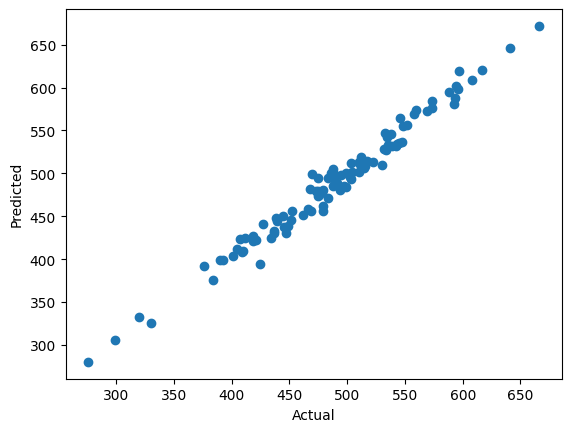

In [41]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

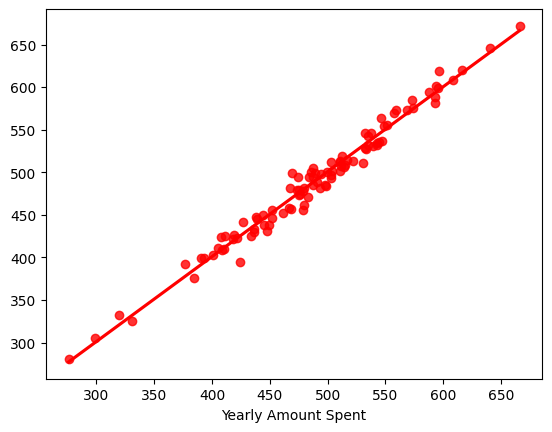

In [42]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

## Actual Versus Predicted

In [43]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
361,401.033135,403.097473,-2.064338
73,534.777188,542.440885,-7.663697
374,418.602742,426.804101,-8.201359
155,503.978379,501.913057,2.065322
104,410.069611,409.886578,0.183033
...,...,...,...
347,593.156401,588.134030,5.022372
86,487.379306,485.214399,2.164907
75,478.719357,456.040621,22.678736
438,392.992256,398.921087,-5.928831
